# Predicting the Effectiveness of Direct Marketing to Acquire Bank Customers
___

## Backgrounder

In the era of data-driven decision-making, the [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) offers a valuable opportunity to explore the effectiveness of direct marketing campaigns conducted via phone calls in a Portuguese banking institution. The primary objective of this project is to predict whether clients will subscribe to a term deposit, a critical financial product for both customers and the bank. 

## Understanding Dataset

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit.

## Used Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn import tree
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

## Data Loading

First, we download and call the dataset that we will be use.

In [2]:
bank_marketing = fetch_ucirepo(id=222)
df = bank_marketing.data.original

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


**Detail Information about data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Based on the detailed information, there are 45,211 data entries, and several columns still contain missing values that need to be cleaned.

## Data Cleaning
First we check the duplicated data.

In [5]:
df.duplicated().sum()

0

Based on the output, there are no duplicate data entries. Next, we will examine missing values or NaN Values that haven't been detected.

In [6]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df)*100

age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64

Based on the output, several columns have missing values, with one of them reaching up to 81%. We will remove the rows containing NaN values in columns with string/object data types.

In [7]:
df = df. dropna()
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [9]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome']
target = ['y']

In [10]:
df_decision = df['y'].value_counts(normalize=True)*100

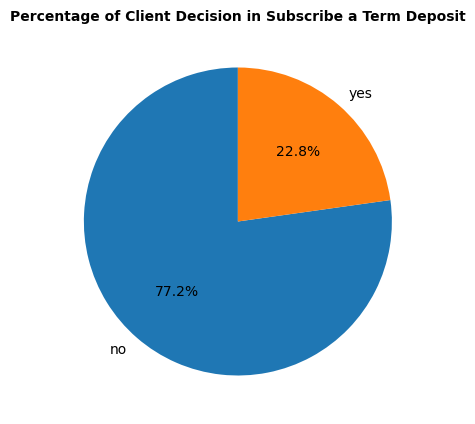

In [11]:
plt.figure(figsize=(5,5))
font = {'weight': 'bold','size': 10,}
ax = plt.axes()
labels=df['y'].unique()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
ab=plt.pie(df_decision, labels=labels, startangle=90,autopct='%1.1f%%')
plt.show()

Based on the above results, it is known that `22.8%` of clients have decided to become bank customers, while the remaining `77.2%` of clients have chosen not to join as bank customers. Thus, it can be concluded that the telephone marketing technique is not very effective.

Next, we will examine the distribution of values in each numeric column.

In [12]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,40.783856,1552.343280,14.260010,261.290615,2.064269,223.252869,3.184264
std,11.282964,3084.580003,7.885328,236.203272,1.566109,111.830127,4.614190
min,18.000000,-1884.000000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,32.000000,162.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,595.000000,14.000000,194.000000,2.000000,195.000000,2.000000
75%,47.000000,1733.750000,20.000000,324.000000,2.000000,326.000000,4.000000
max,89.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


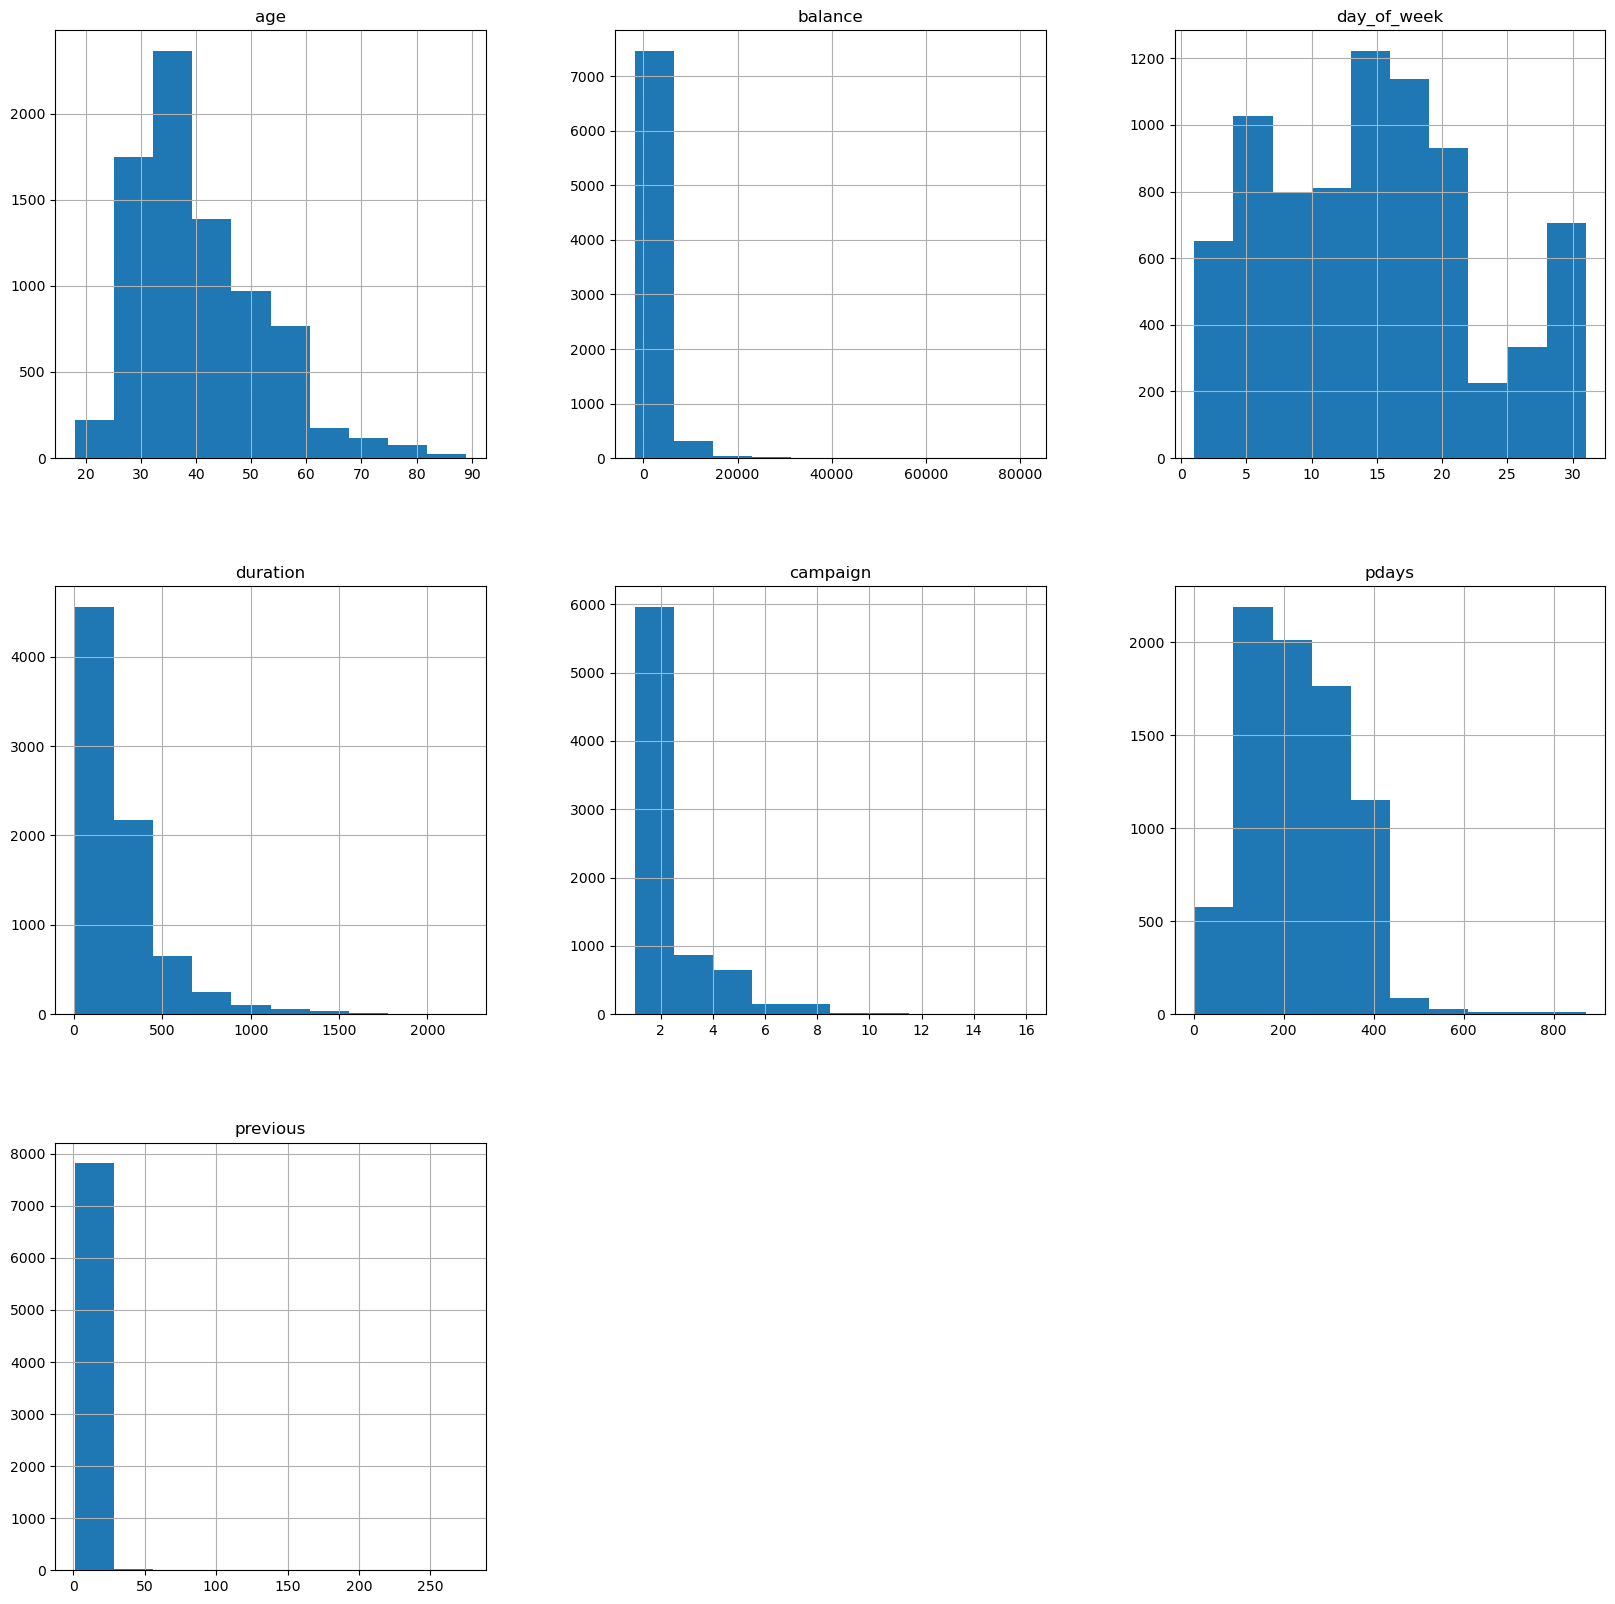

In [13]:
df.hist(figsize=(20,20))
plt.show()

Based on the output, none of the columns with numeric data types have a normal distribution.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          7842 non-null   int64 
 1   job          7842 non-null   object
 2   marital      7842 non-null   object
 3   education    7842 non-null   object
 4   default      7842 non-null   object
 5   balance      7842 non-null   int64 
 6   housing      7842 non-null   object
 7   loan         7842 non-null   object
 8   contact      7842 non-null   object
 9   day_of_week  7842 non-null   int64 
 10  month        7842 non-null   object
 11  duration     7842 non-null   int64 
 12  campaign     7842 non-null   int64 
 13  pdays        7842 non-null   int64 
 14  previous     7842 non-null   int64 
 15  poutcome     7842 non-null   object
 16  y            7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


After the training data process, the dataset has been reduced to 7842 rows and 17 columns, and there are no duplicate data entries.

## Data Preprocessing

Before proceeding to the classification stage, we first need to encode the data to ensure compatibility with the machine learning algorithms.

In [15]:
encoder = preprocessing.LabelEncoder()
for col in categorical:
    df[col] = encoder.fit_transform(df[col])
for col in target:
    df[col] = encoder.fit_transform(df[col])

/tmp/ipykernel_3458/3127427661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
/tmp/ipykernel_3458/3127427661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
/tmp/ipykernel_3458/3127427661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

We also perform data splitting for training and testing purposes. Here, we divide the data into 75% for training and 25% for testing to evaluate the model's performance effectively.

In [16]:
X = df[features]
y = df[target]
X, y = np.array(X), np.array(y)
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Classification
___

### Logistic Regression

In [17]:
lr = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=1)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(classification_report(y_test, lr_pred))
print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1514
           1       0.65      0.49      0.56       447

    accuracy                           0.82      1961
   macro avg       0.76      0.71      0.73      1961
weighted avg       0.81      0.82      0.82      1961

Accuracy: 0.8240693523712391


In [18]:
confusion_matrix(y_test, lr_pred)

array([[1395,  119],
       [ 226,  221]])

The Logistic Regression model demonstrates an accuracy of approximately `82.41%` in predicting the target classes. The precision, recall, and F1-score for class 0 (clients not subscribing to the term deposit) are relatively high, indicating that the model is good at identifying non-subscribers. However, for class 1 (clients subscribing to the term deposit), the precision, recall, and F1-score are lower.

### K-Nearest Neighbour

First, we perform k-fold cross-validation using the K-Nearest Neighbors (KNN) classifier. This process helps in determining the optimal `k-value` for the KNN algorithm by evaluating its performance across multiple folds.

In [20]:
cv_scores = []
k_values = list(range(1, 16))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-

Text(0, 0.5, 'Mean score')

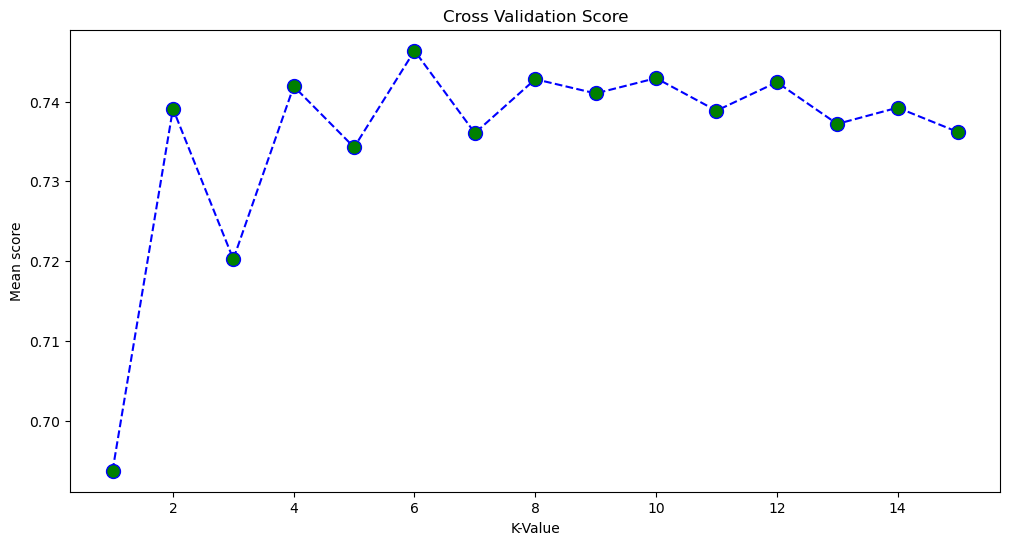

In [21]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16), cv_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Cross Validation Score')
plt.xlabel('K-Value')
plt.ylabel('Mean score')

In [22]:
best_k = k_values[cv_scores.index(max(cv_scores))]
print("Nilai k terbaik adalah:", best_k)

Nilai k terbaik adalah: 6


Based on the cross-validation results, we determine that the optimal `k-value` is `6`.

In [23]:
knn2 = KNeighborsClassifier(n_neighbors=6)

# Melatih model dengan menggunakan data train
knn2.fit(X_train, y_train)

# Hasil predict
knn2_pred = knn2.predict(X_test)

print(classification_report(knn2_pred,y_test))
print("Accuracy:",metrics.accuracy_score(knn2_pred,y_test))

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1661
           1       0.40      0.59      0.47       300

    accuracy                           0.80      1961
   macro avg       0.66      0.71      0.68      1961
weighted avg       0.84      0.80      0.81      1961

Accuracy: 0.7995920448750637


The KNN demonstrates an accuracy of approximately `79.99%` in predicting the target classes. The precision, recall, and F1-score for class 0 (clients not subscribing to the term deposit) are relatively high, indicating that the model is good at identifying non-subscribers. However, for class 1 (clients subscribing to the term deposit), the precision, recall, and F1-score are lower.

In [ ]:
confusion_matrix(y_test, knn2_pred)

array([[1391,  123],
       [ 270,  177]])

### Naive Bayes

In [ ]:
nb = GaussianNB()

nb.fit(X_train,y_train)

nb_pred = nb.predict(X_test)

print(classification_report(y_test, nb_pred))
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1514
           1       0.48      0.81      0.60       447

    accuracy                           0.75      1961
   macro avg       0.70      0.77      0.71      1961
weighted avg       0.83      0.75      0.77      1961

Accuracy: 0.7536970933197348


/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
confusion_matrix(y_test, nb_pred)

array([[1117,  397],
       [  86,  361]])

The Naive Bayes model achieved an accuracy of approximately `75.37%` in predicting term deposit subscriptions. While it demonstrated high recall for subscribers (class 1), indicating its ability to capture actual positives, the precision for class 1 is relatively low, suggesting a higher false positive rate. The model performs better at identifying non-subscribers (class 0) with good precision and recall values.

### Support Vector Machine

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train,y_train)

svm_score_train = svm_model.score(X_train, y_train)
print(svm_score_train)

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.772827750382588


/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svm_pred = svm_model.predict(X_test)
print(classification_report(svm_pred,y_test))
print("Accuracy:",metrics.accuracy_score(svm_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1956
           1       0.00      0.40      0.01         5

    accuracy                           0.77      1961
   macro avg       0.50      0.59      0.44      1961
weighted avg       1.00      0.77      0.87      1961

Accuracy: 0.771545130035696


In [ ]:
confusion_matrix(y_test, svm_pred)

array([[1511,    3],
       [ 445,    2]])

The SVM model achieved an accuracy of `77.15%` in predicting term deposit subscriptions. While it demonstrated high precision for non-subscribers (class 0), indicating very few false positives, the recall for subscribers (class 1) is low, suggesting that it fails to capture a significant portion of actual positives. The F1-score for class 1 is also low, indicating poor balance between precision and recall.

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

print(classification_report(y_test, rf_pred))
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1514
           1       0.73      0.58      0.65       447

    accuracy                           0.85      1961
   macro avg       0.80      0.76      0.78      1961
weighted avg       0.85      0.85      0.85      1961

Accuracy: 0.8546659867414584


In [ ]:
confusion_matrix(y_test, rf_pred)

array([[1416,   98],
       [ 187,  260]])

The Random Forest model performed well with an accuracy of `85.47%` in predicting term deposit subscriptions. It demonstrated a good balance between precision and recall for both classes, indicating accurate identification of both subscribers and non-subscribers. The model's F1-scores for both classes are reasonable, reflecting a harmonious blend of precision and recall. 

### Decision Tree

In [ ]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth=2, criterion='gini')

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

# Predict the response for test dataset
dt_pred = dt.predict(X_test)

print(classification_report(y_test, dt_pred))
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1514
           1       0.74      0.47      0.57       447

    accuracy                           0.84      1961
   macro avg       0.80      0.71      0.74      1961
weighted avg       0.83      0.84      0.83      1961

Accuracy: 0.8408975012748597


In [ ]:
confusion_matrix(y_test, dt_pred)

array([[1441,   73],
       [ 239,  208]])

The model achieved an accuracy of `84%`, indicating its overall performance in predicting term deposit subscriptions. For non-subscribers (class 0), the precision was 86% and recall was 95%, resulting in an F1-score of 90%. However, for subscribers (class 1), precision was 74%, recall was 47%, and the F1-score was 57%. 

# Conclusion

Based on several experiments conducted, it can be concluded that:

1. There are `22.8%` of clients who decide to become bank customers, while `77.2%` of clients choose not to join as bank customers. Therefore, it can be concluded that the telephone marketing technique is less effective to be implemented.
2. From the performed Machine Learning modeling, the results indicate that the model still has an approximately `20%` chance of making detection errors. A model that performs relatively well in predictions is Random Forest, achieving an accuracy of `85.47%`. Some errors may occur due to the imbalance in target data (data imbalance), requiring further exploration of the data.